In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
df = pd.read_csv('/content/netflix_titles.csv', sep = ',')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [50]:
# Resumo técnico dos dados
print("\nInformações sobre o DataFrame:")
print(df.info())

# Quantidade de valores nulos por coluna
print("\nContagem de valores nulos por coluna:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None

Contagem de valores nulos por coluna:
|              | 0    |
|:-------------|:-----|
| show_id      | 0    |
| type         | 0    |
| title        | 0    |
| director     | 1969 |
| cast         | 570  |
| countr

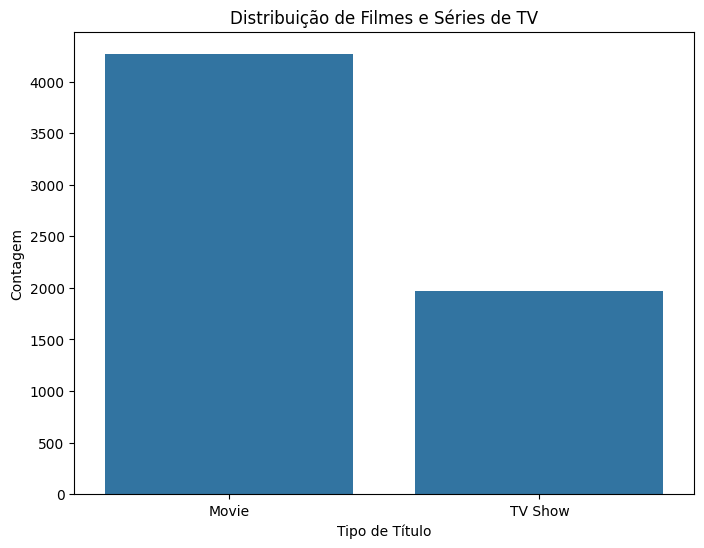

In [51]:
# Gráfico 1: Contagem de Filmes vs. Séries
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribuição de Filmes e Séries de TV')
plt.xlabel('Tipo de Título')
plt.ylabel('Contagem')
plt.show()

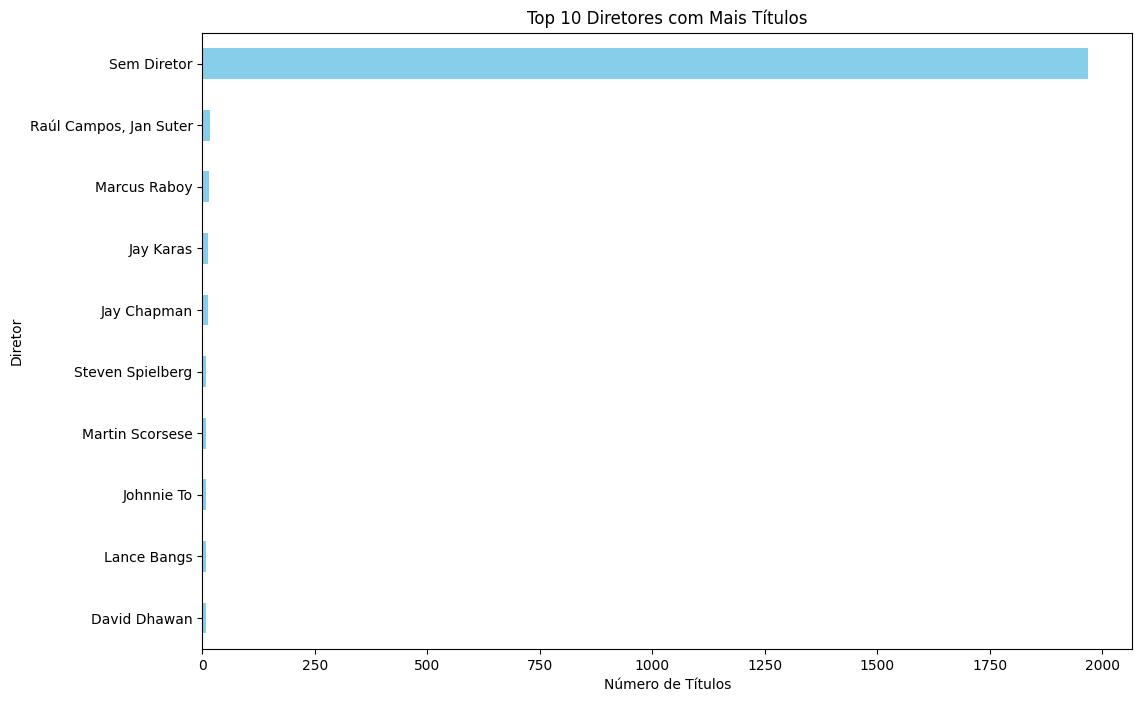

In [52]:
# Gráfico 2: Top 10 Diretores (tratando os valores nulos)
plt.figure(figsize=(12, 8))
df['director'].fillna('Sem Diretor').value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Diretores com Mais Títulos')
plt.xlabel('Número de Títulos')
plt.ylabel('Diretor')
plt.gca().invert_yaxis()
plt.show()

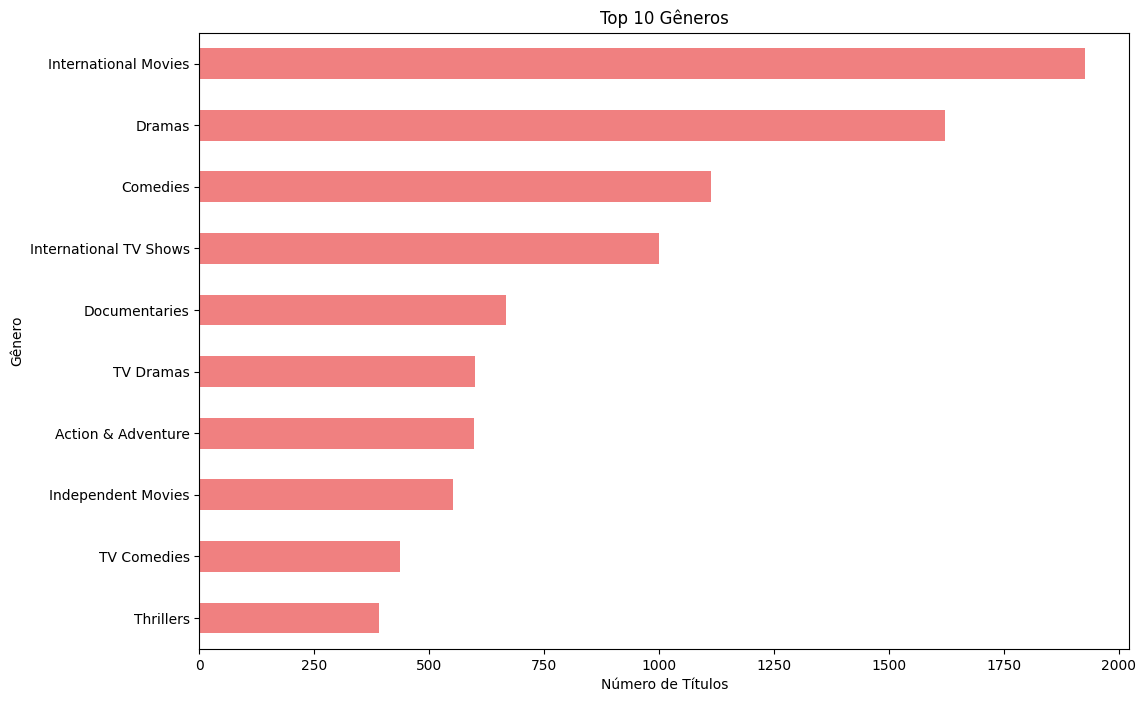

In [53]:
# Gráfico 3: Top 10 Gêneros
plt.figure(figsize=(12, 8))
genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
genres.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Gêneros')
plt.xlabel('Número de Títulos')
plt.ylabel('Gênero')
plt.gca().invert_yaxis()
plt.show()

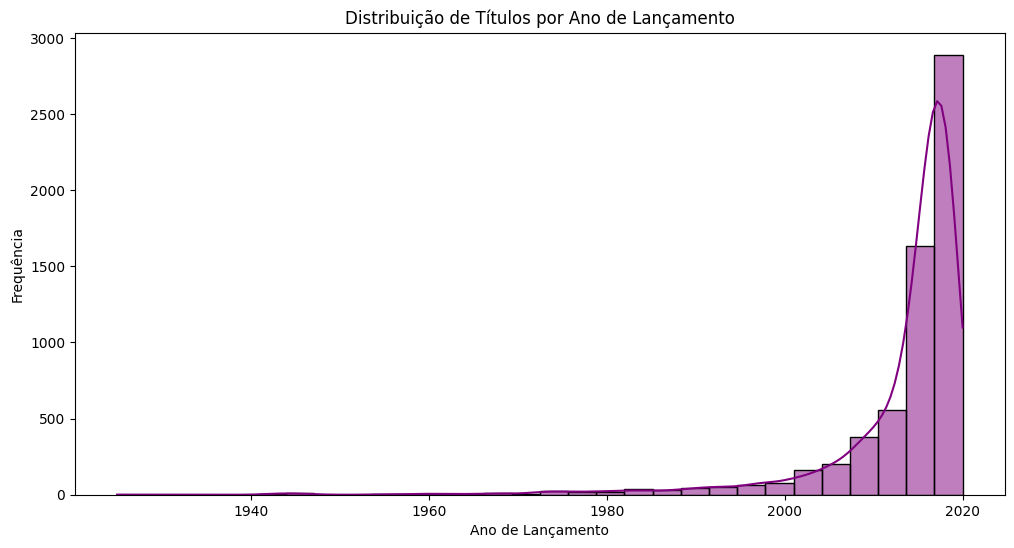

In [54]:
# Gráfico 4: Distribuição de Anos de Lançamento
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribuição de Títulos por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Frequência')
plt.show()

In [55]:
# Preencher os valores nulos com uma string vazia
features = ['director', 'cast', 'listed_in', 'description']
for feature in features:
    df[feature] = df[feature].fillna('')

In [56]:
# Criar coluna 'tags'
def create_tags(row):
   return ' '.join(row[features]).lower()

df['tags'] = df.apply(create_tags, axis=1)

In [57]:
# Visualizar a coluna 'tags'
print("Primeiras 5 linhas do DataFrame com a nova coluna 'tags':")
print(df[['title', 'tags']].head().to_markdown(index=False, numalign="left", stralign="left"))

Primeiras 5 linhas do DataFrame com a nova coluna 'tags':
| title                                   | tags                                                                                                                                                                                                                                                                                                                                                    |
|:----------------------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Norm of the North: King Sized Adventure | richard finn, tim maltby alan marriott, andrew toth, brian dobson, cole howard, jennifer cameron, jonathan holmes, lee

In [58]:
# Inicializar e aplicar o TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [59]:
# Gerar a matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags'])

In [60]:
# Inspecionar o resultado
print("Formato da matriz TF-IDF:")
print(tfidf_matrix.shape)

Formato da matriz TF-IDF:
(6234, 5000)


In [61]:
# Vetorização do texto com TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tags'])

In [62]:
# Cálculo da Similaridade do Cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [63]:
# Mapeamento de Títulos para Índices
indices = pd.Series(df.index, index=df['title'])

In [64]:
# Criação da Função de Recomendação
def get_recommendations(title, cosine_sim_matrix=cosine_sim, df=df, indices=indices):
    if title not in indices:
        return f"O filme '{title}' não foi encontrado na base de dados."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [67]:
# Teste o seu modelo
print("Recomendações para 'The Crown':")
print(get_recommendations('The Crown').to_markdown(numalign="left", stralign="left"))

Recomendações para 'The Crown':
|      | title                             |
|:-----|:----------------------------------|
| 2007 | London Spy                        |
| 5814 | Call the Midwife                  |
| 6100 | Flowers                           |
| 6177 | Hinterland                        |
| 3290 | Black Earth Rising                |
| 6050 | The Frankenstein Chronicles       |
| 2054 | Traitors                          |
| 4516 | Minute to Win It                  |
| 1010 | Greatest Events of WWII in Colour |
| 4309 | The Real Football Factories       |
